### Importing necessary libraries

In [1]:
import SimpleITK as sitk 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os

## load_data function
This function takes the path of dataset as input and reads all the images from all the subdirectories of the main path. The first image in each subdirectory is a 3D image and there are nine 2D images which are tumors segmented from that 3D image by different experts. data_x list contains the 3D image and ground truth images are stored on data_y. load_data returns these two lists.

In [2]:
def load_data(path):
    my_dir1 = os.listdir(path)
    my_dir1 = np.array(my_dir1)[1:]
    data_x = []
    data_y = []
    count = 0
    for p in tqdm(my_dir1):
        my_dir2 = os.listdir(path+p)
        for q in my_dir2:
            img_rd = sitk.ReadImage(path + p + '/' + q)
            img_ra = sitk.GetArrayFromImage(img_rd)
            if count == 0: #As the 3D train image is the first entry
                data_x.append(img_ra) 
            if count!=0: #The segmented ground truth images are next
                data_y.append(img_ra)
            count = count + 1
        count = 0
    return data_x, data_y

#### Calling the load_data function with the training images' path

In [3]:
path = './Training/'
data_x_train, data_y_train = load_data(path)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:09<00:00,  2.87it/s]


#### Printing the shape of the 3D image and it's 2D segmented image. 
There are total 28 3D images. Each 3D image has 4 2D images. There are 9 segmented images for each 3D image. So there are total 252 2D segmented images in the train set.

In [4]:
print('shape of train set is' + str(np.array(data_x_train).shape))
print('shape of train ground truth set is' + str(np.array(data_y_train).shape))

shape of train set is(28, 4, 240, 240)
shape of train ground truth set is(252, 240, 240)


#### Converting the data_x_train and data_y_train to numpy arrays

In [5]:
data_x_train = np.array(data_x_train)
data_y_train = np.array(data_y_train)

### showim3dto2d funtion 
This function takes the train set as input and plots them. The four 2D images of each 3D image plotted consecutively.

In [6]:
def showim3dto2d(data_x):
    count = 0
    for i in range(data_x.shape[0]):
        for j in range(data_x.shape[1]):
            print(count)
            plt.imshow(data_x[i,j,:,:])
            plt.show()
            count = count+1

0


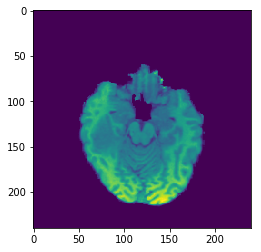

1


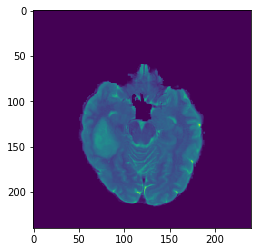

2


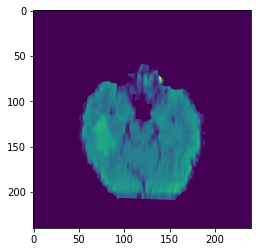

3


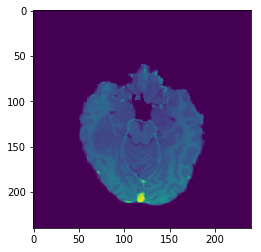

4


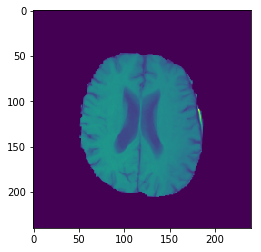

5


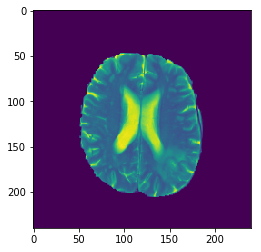

6


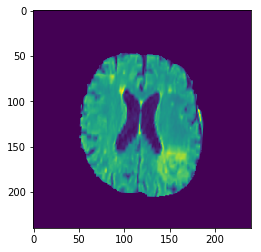

7


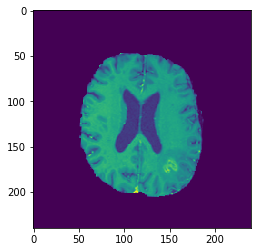

8


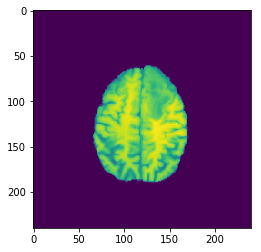

9


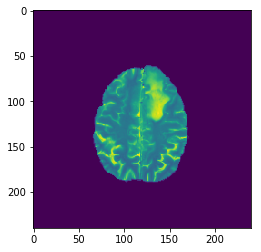

10


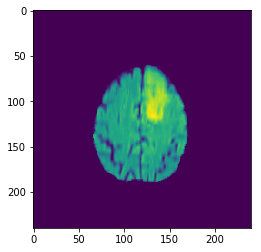

11


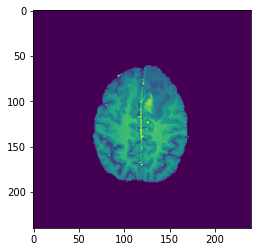

12


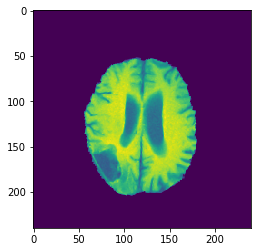

13


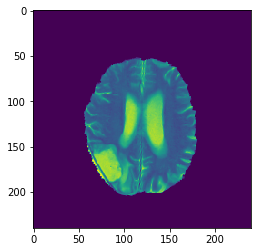

14


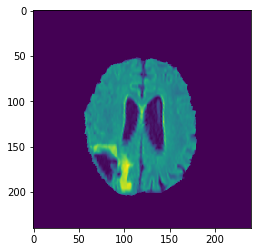

15


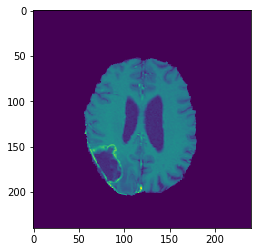

16


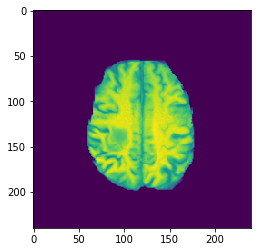

17


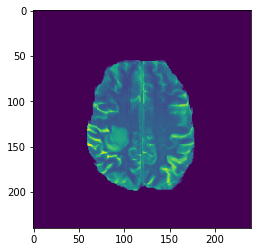

18


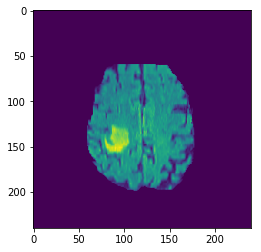

19


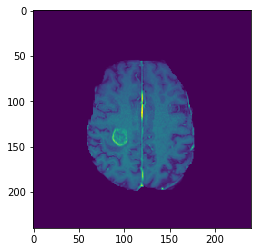

20


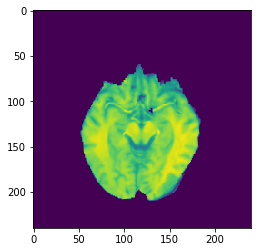

21


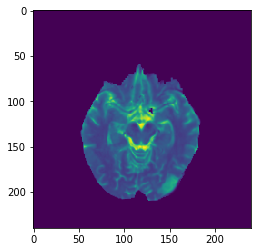

22


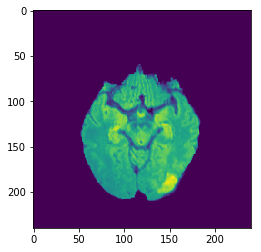

23


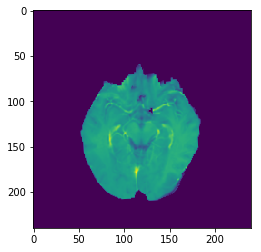

24


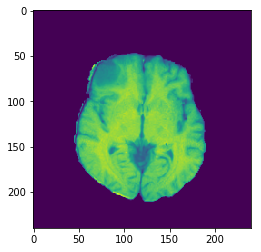

25


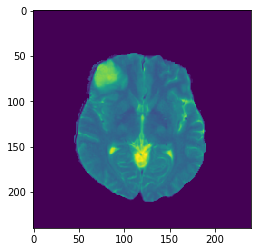

26


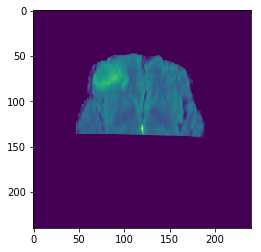

27


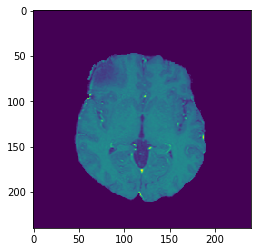

28


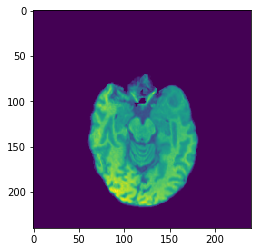

29


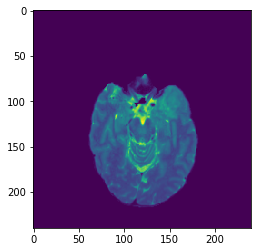

30


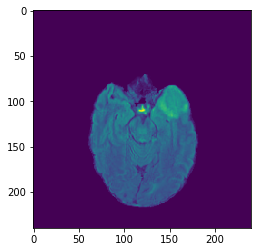

31


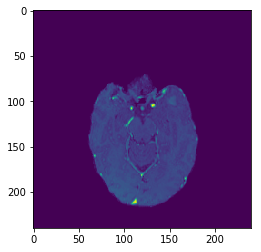

32


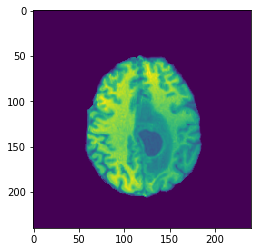

33


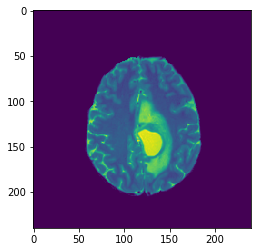

34


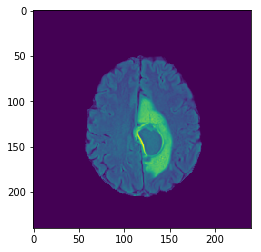

35


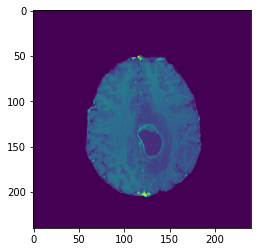

36


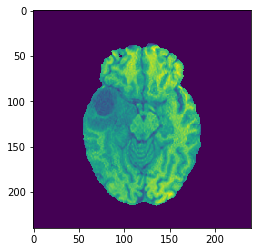

37


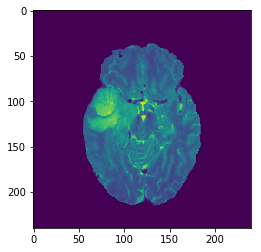

38


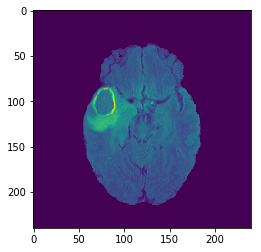

39


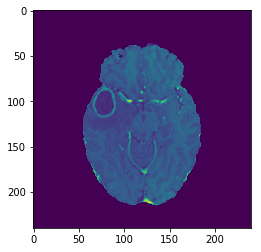

40


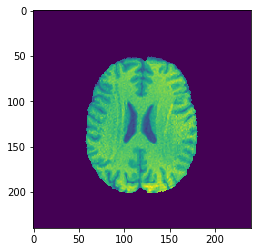

41


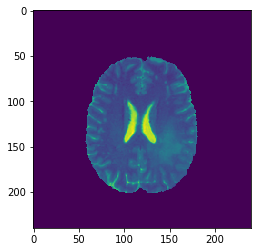

42


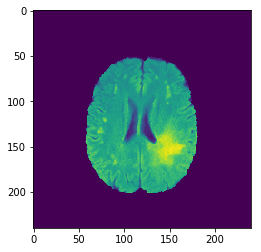

43


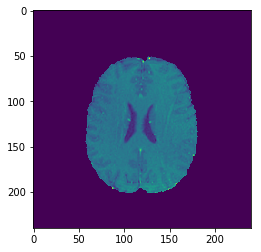

44


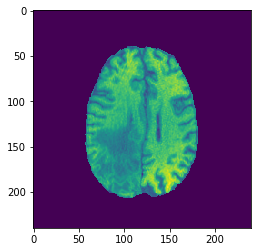

45


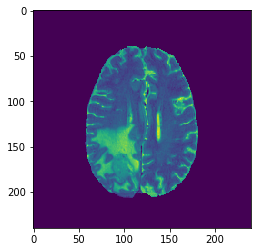

46


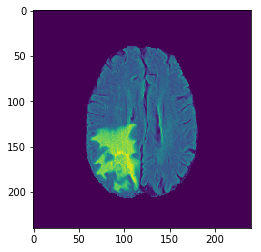

47


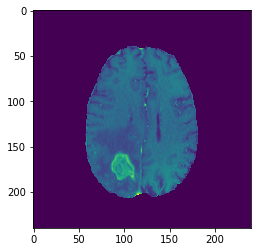

48


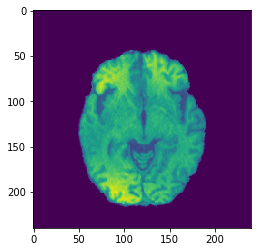

49


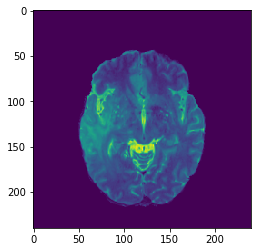

50


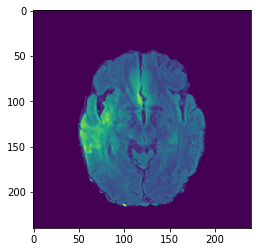

51


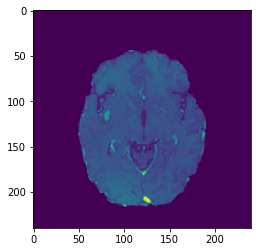

52


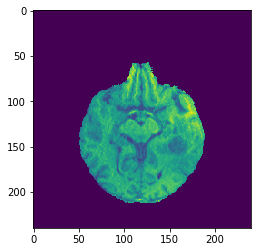

53


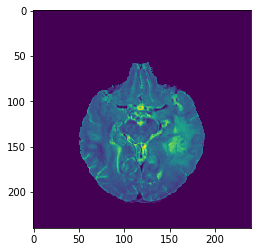

54


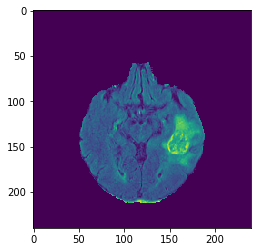

55


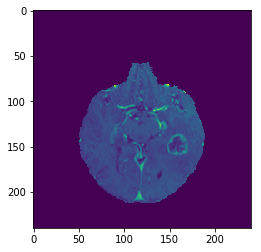

56


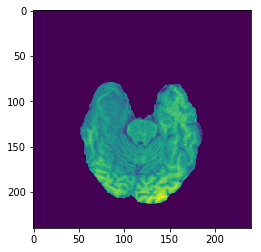

57


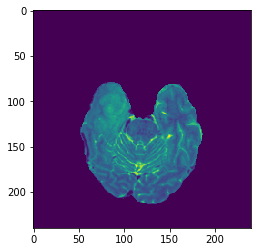

58


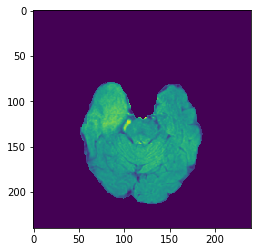

59


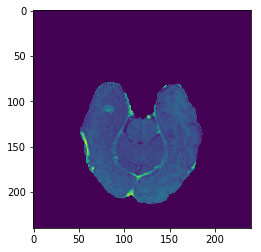

60


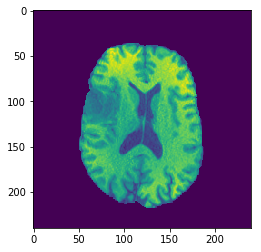

61


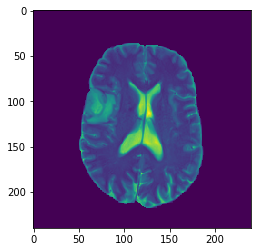

62


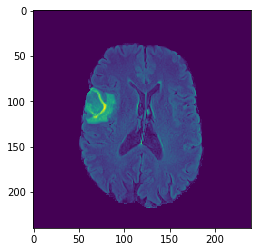

63


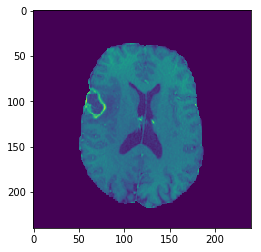

64


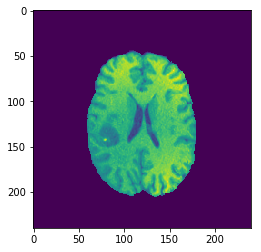

65


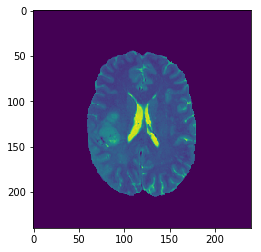

66


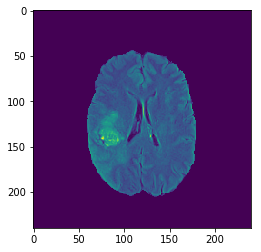

67


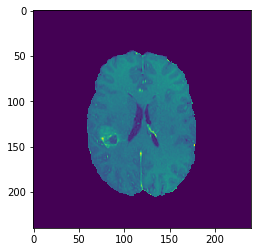

68


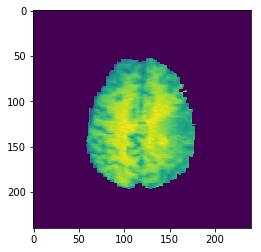

69


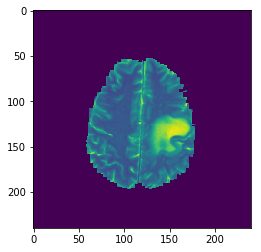

70


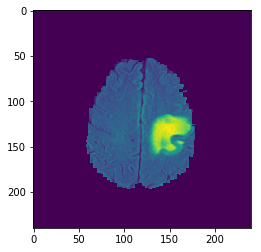

71


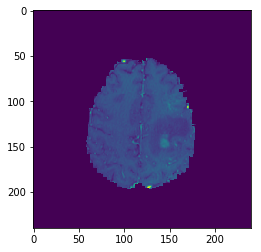

72


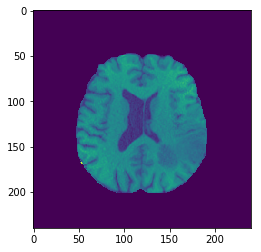

73


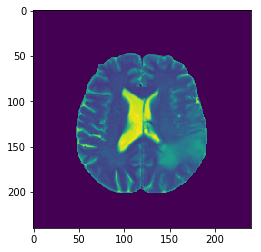

74


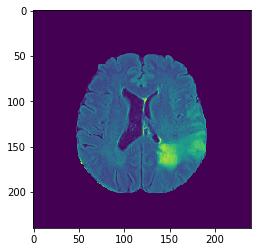

75


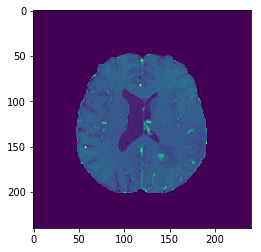

76


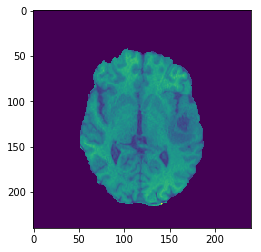

77


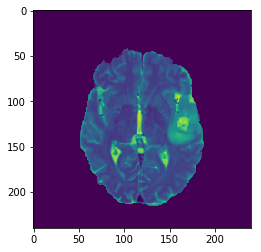

78


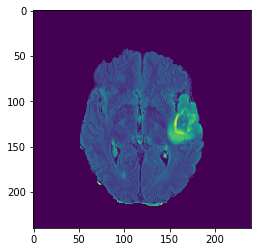

79


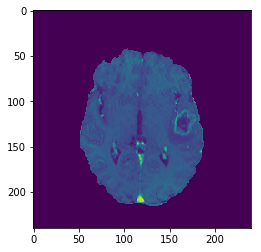

80


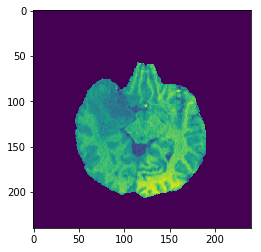

81


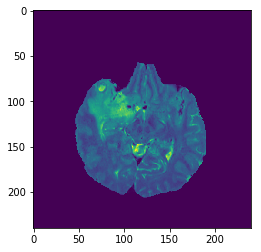

82


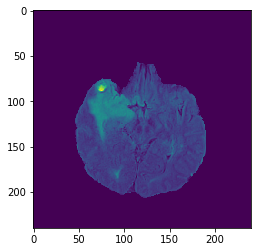

83


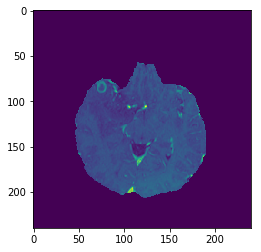

84


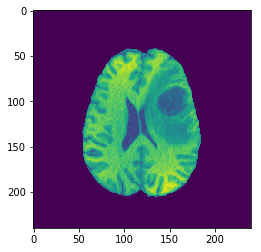

85


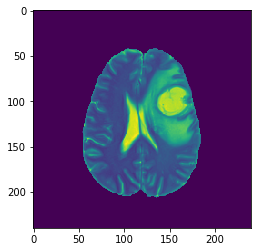

86


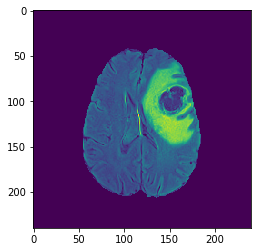

87


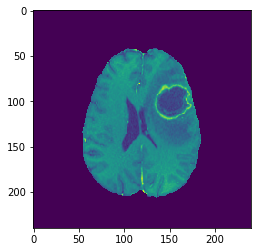

88


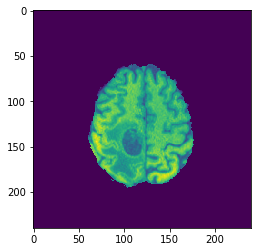

89


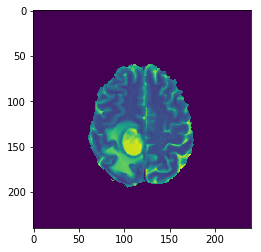

90


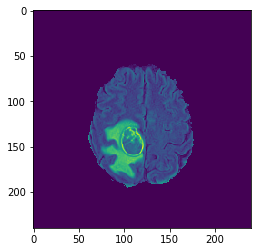

91


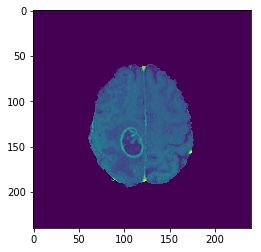

92


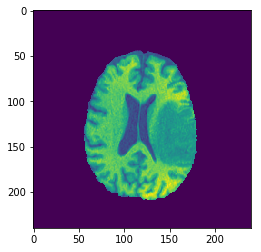

93


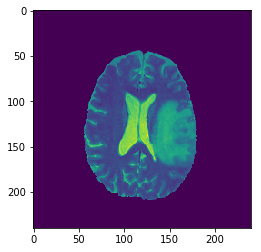

94


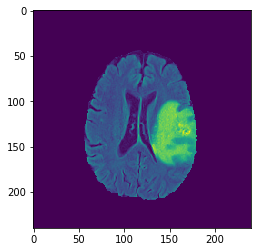

95


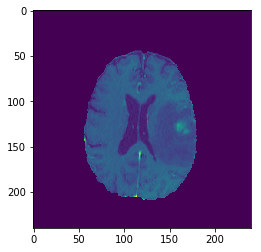

96


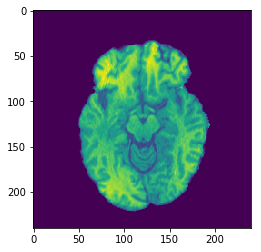

97


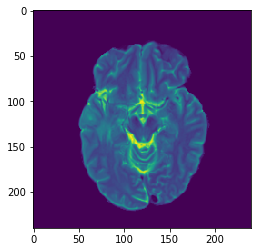

98


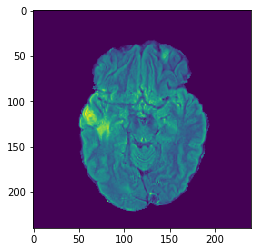

99


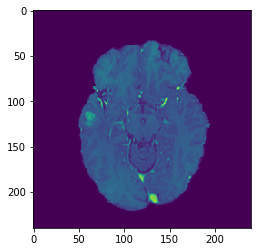

100


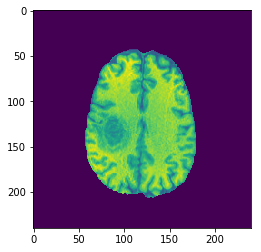

101


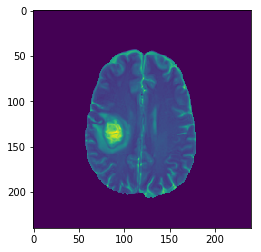

102


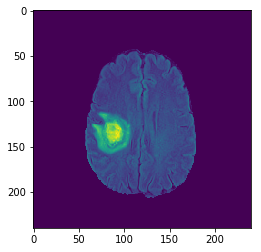

103


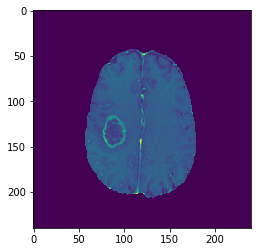

104


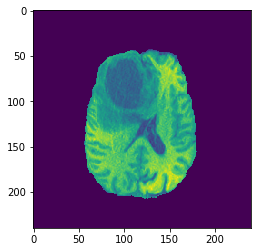

105


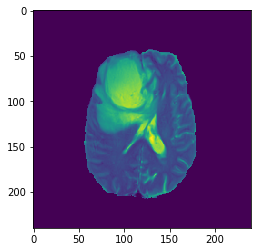

106


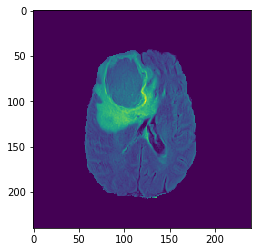

107


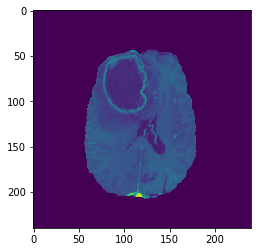

108


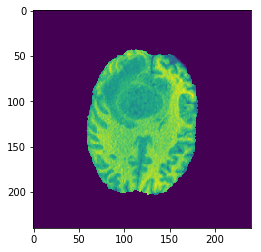

109


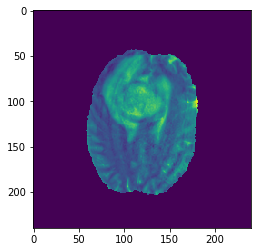

110


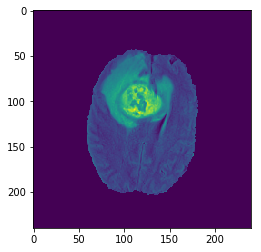

111


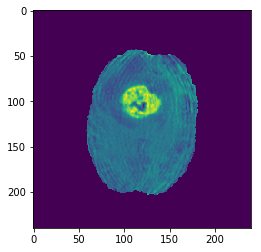

In [7]:
showim3dto2d(data_x_train)

### showgroundsegmentation function
This function takes two parameters segmented images and number of images to display. It displays the ground truth segmented images.

In [8]:
def showgroundsegmentation(data_y, n):
    for i in range(n):
        plt.imshow(np.array(data_y)[i,:,:])
        plt.show()

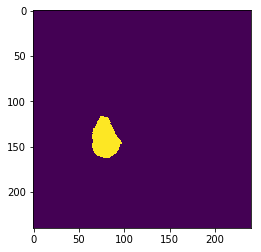

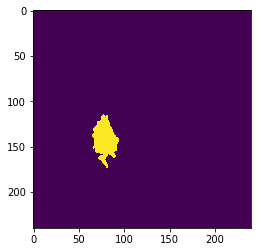

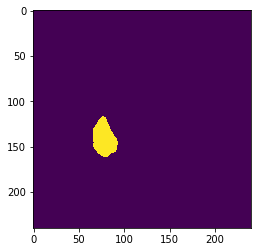

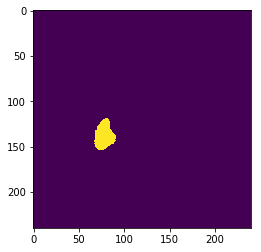

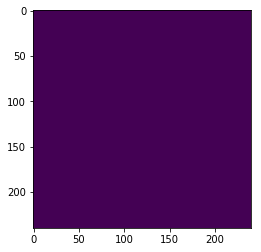

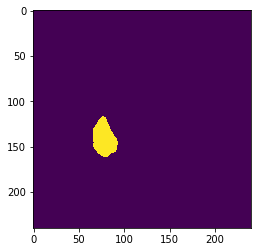

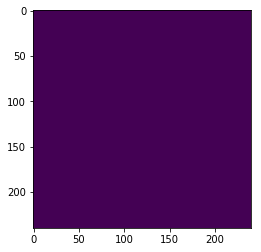

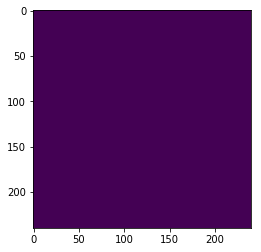

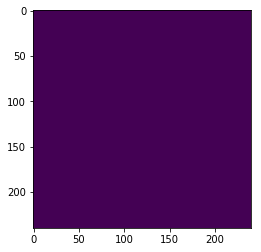

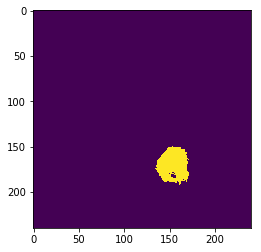

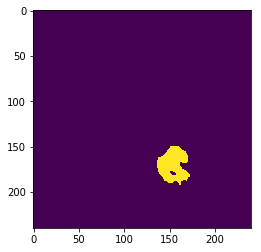

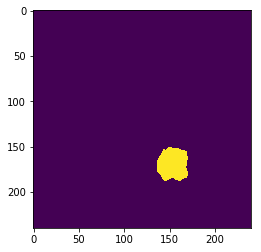

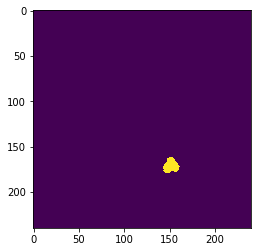

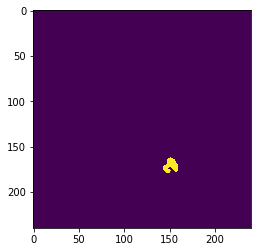

In [9]:
showgroundsegmentation(data_y_train, 14)

### slice3dto2d function
This function takes the training 3D images and convert them into four 2D images. These images are appended to the data_x_expnd_train list.

In [9]:
def slice3dto2d(data_x_train):
    data_x_expnd_train = []
    for i in range(data_x_train.shape[0]):
        for j in range(data_x_train.shape[1]):
            if j == 0:
                for k in range(3):
                    data_x_expnd_train.append(data_x_train[i,j,:,:])#taking 1st image 3 times
            else:
                for l in range(2):
                    data_x_expnd_train.append(data_x_train[i,j,:,:])#taking 2nd, 3rd and 4th images 2 times each
    return data_x_expnd_train

#### Showing the shape of the training set after slicing them into multiple 2D images.

In [10]:
data_x_expnd_train = slice3dto2d(data_x_train)
data_x_expnd_train = np.array(data_x_expnd_train)
data_y_train1 = data_y_train
print('New shape of train set is' + str(data_x_expnd_train.shape))

New shape of train set is(252, 240, 240)


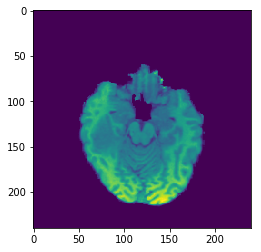

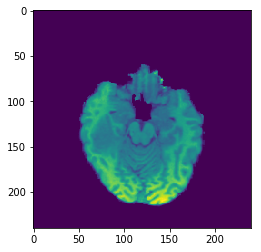

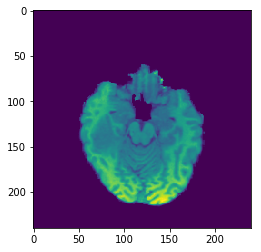

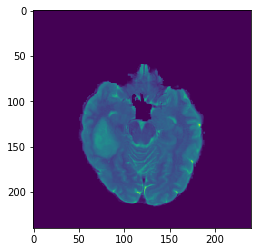

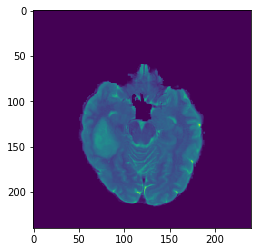

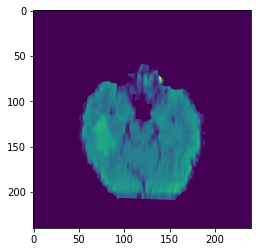

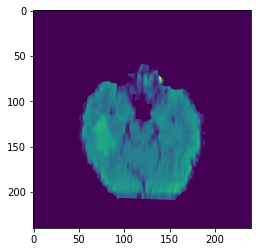

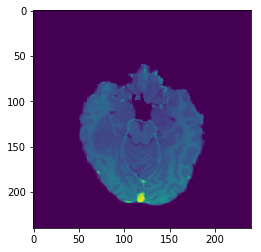

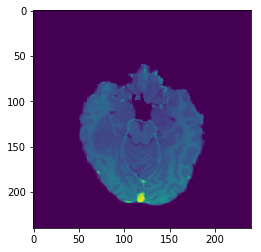

In [12]:
showgroundsegmentation(data_x_expnd_train,9)

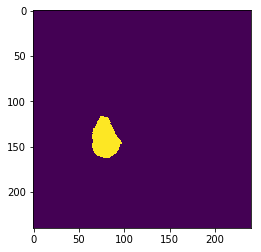

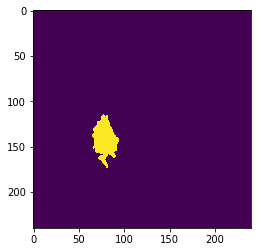

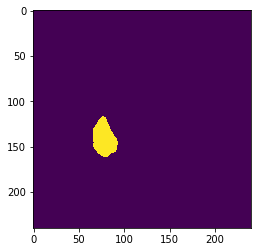

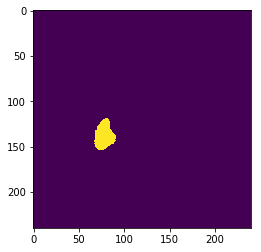

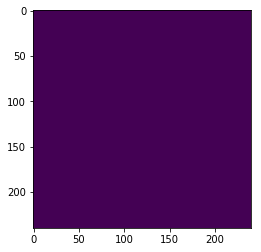

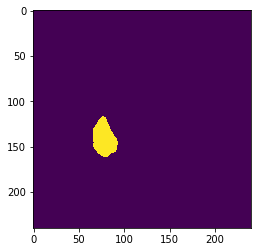

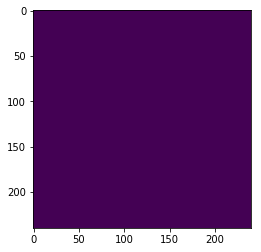

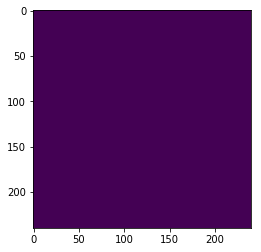

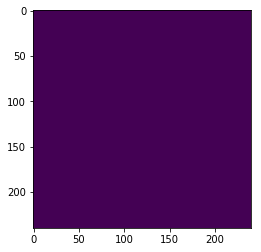

In [13]:
showgroundsegmentation(data_y_train1, 9)

### replacemask function
There are some images in the segmented ground truth, which don't have any segmented tumors. These images are blank. This function takes the segmented ground truth images as input and replaces blank images with the previously segmented images.

In [11]:
def replacemask(data_y_train1):
    for i in range(data_y_train1.shape[0]):
        result = np.all((data_y_train1[i,:,:] == 0))
        if result and i%9!=0:
            data_y_train1[i,:,:] = data_y_train1[i-1,:,:]
        elif result and i%9==0:
            data_y_train1[i,:,:] = data_y_train1[i+1,:,:]
    return data_y_train1

In [12]:
data_y_train1 = replacemask(data_y_train1)

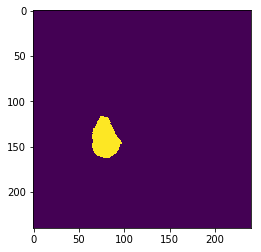

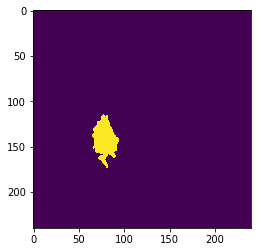

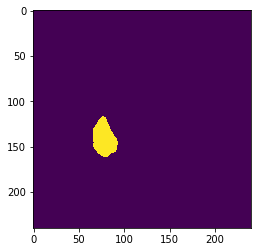

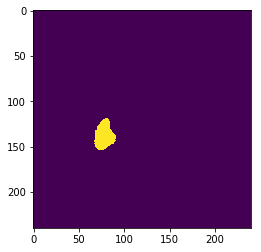

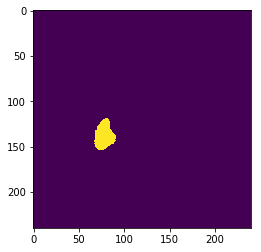

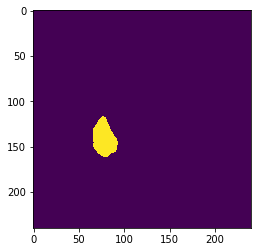

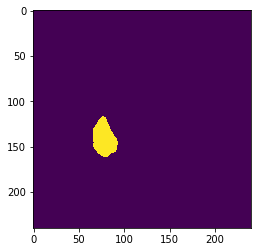

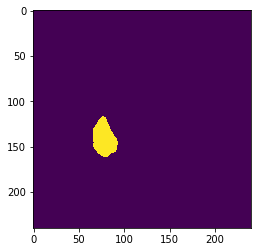

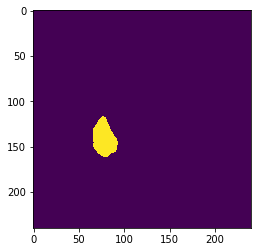

In [16]:
showgroundsegmentation(data_y_train1, 9)

#### calling the load_data function with the path containing validation images.

In [13]:
path = './validation/'
data_x_val, data_y_val = load_data(path)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.72it/s]


#### Shape of validation images and their corresponding ground truth images.

In [14]:
print('shape of validation set is' + str(np.array(data_x_val).shape))
print('shape of validation ground truth set is' + str(np.array(data_y_val).shape))

shape of validation set is(3, 4, 240, 240)
shape of validation ground truth set is(27, 240, 240)


In [15]:
data_x_val = np.array(data_x_val)
data_y_val = np.array(data_y_val)

#### Calling showim3dto2d function to plot the validation images

0


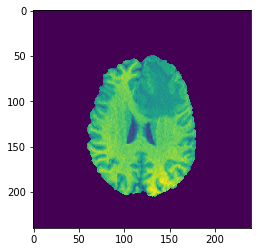

1


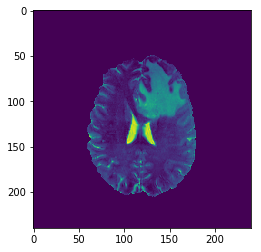

2


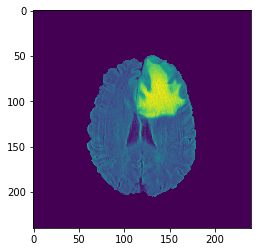

3


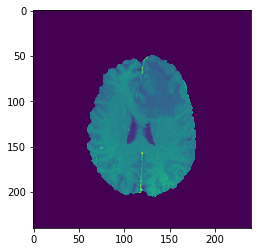

4


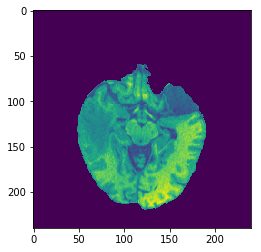

5


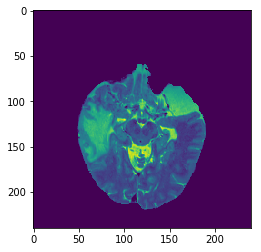

6


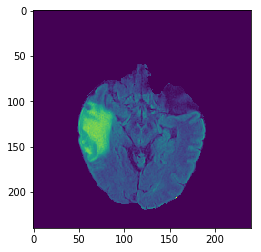

7


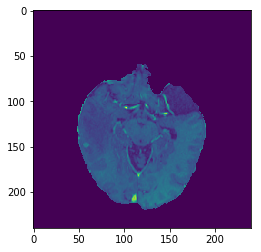

8


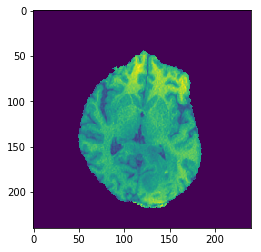

9


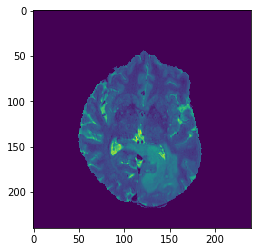

10


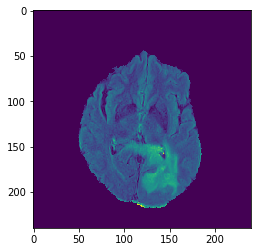

11


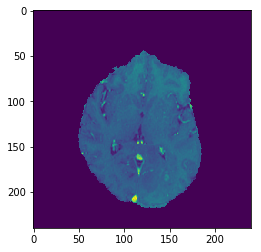

In [17]:
showim3dto2d(data_x_val)

#### Calling the showgroundsegmentation function to see first seven segmented ground truth images of the validation set. We can see that, there are multiple blank images in the first 7 segmented ground truth images.

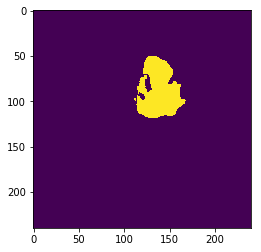

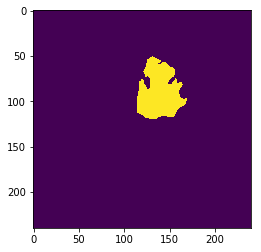

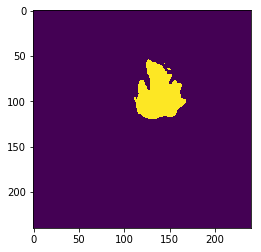

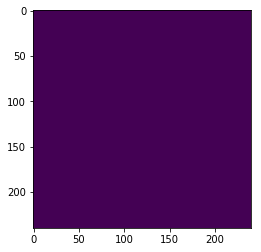

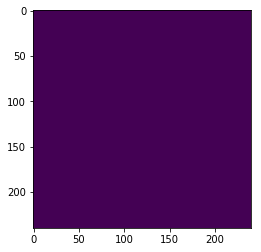

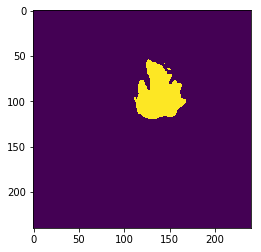

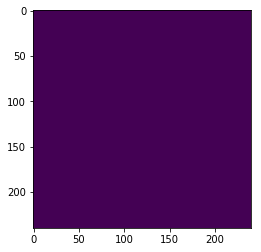

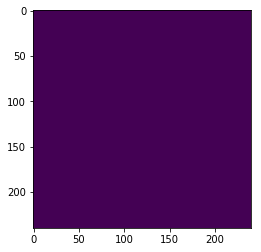

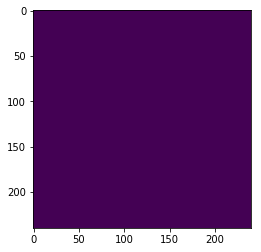

In [18]:
showgroundsegmentation(data_y_val, 9)

#### Converting the 3D images to 2D images and printing the new shape of the validation set

In [16]:
data_x_expnd_val = slice3dto2d(data_x_val)
data_x_expnd_val = np.array(data_x_expnd_val)
data_y_val1 = data_y_val
print('New shape of validation set is' + str(data_x_expnd_val.shape))

New shape of validation set is(27, 240, 240)


#### Calling the replacemask function to replace the blank images with the previous segmented images.

In [17]:
data_y_val1 = replacemask(data_y_val1)

#### After calling the showgroundsegmentation function with the replaced ground truth images, we can see that the blank images are absent. 

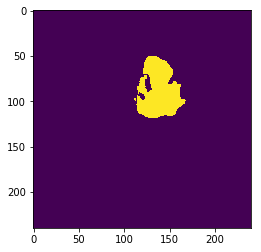

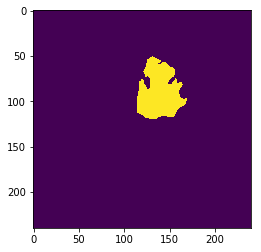

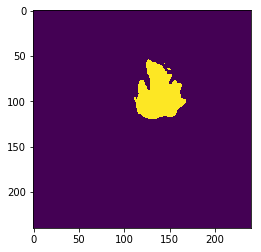

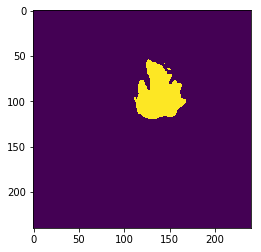

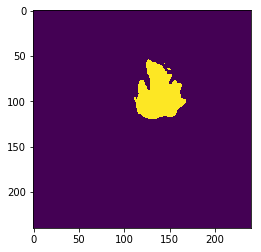

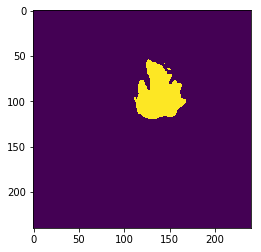

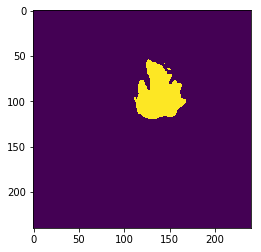

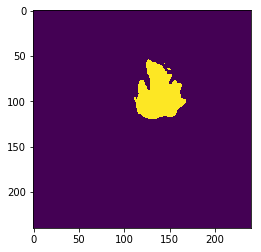

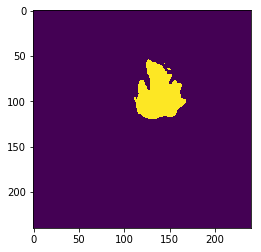

In [21]:
showgroundsegmentation(data_y_val1, 9)

### appendtrainval function
This function appends the train set and validation set

In [18]:
def appendtrainval(data_x_expnd_train, data_x_expnd_val):
    data = []
    count = 0
    m = data_x_expnd_train.shape[0]
    n = data_x_expnd_val.shape[0]
    for i in range(m+n):
        if i < m:
            data.append(data_x_expnd_train[i,:,:])
        else:
            data.append(data_x_expnd_val[count,:,:])
            count = count + 1
    return data

#### Variable data contains all the images from the training set and validation set. Variable gt contains all the appended corresponding ground truth images.

In [19]:
data = appendtrainval(data_x_expnd_train, data_x_expnd_val)
gt = appendtrainval(data_y_train1, data_y_val1)

In [20]:
print(np.array(data).shape)
print(np.array(gt).shape)

(279, 240, 240)
(279, 240, 240)


In [21]:
def img_preprocess(img):
    img -= np.min(img)  # [0,?]
    img /= np.max(img)  # [0,1]
    img *= 2           # [0,2]
    return img - 1     # [-1,1]

In [22]:
def reshp_brim(data, gt, shp):
    gt = np.array(gt).astype(np.uint8)
    data_all = []
    gt_all = []
    
    
    for i in range(np.array(data).shape[0]):
        result1 = np.zeros([shp[0],shp[1]]).astype(np.float32)
        result1[8:np.array(data).shape[1]+8,8:np.array(data).shape[2]+8] = np.array(data)[i,:,:]
        result1 = img_preprocess(result1)
        result1 = result1.reshape(result1.shape[0],result1.shape[0],1)
        data_all.append(result1)
        
    for i in range(np.array(gt).shape[0]):
        result2 = np.zeros([shp[0],shp[1]]).astype(np.uint8)
        result2[8:np.array(gt).shape[1]+8,8:np.array(gt).shape[2]+8] = np.array(gt)[i,:,:]
        result2 = result2.reshape(result2.shape[0],result2.shape[0],1)
        gt_all.append(result2)
    return data_all , gt_all                  

In [23]:
data , gt = reshp_brim(data , gt, [256,256])

In [24]:
data = np.array(data)
gt = np.array(gt)

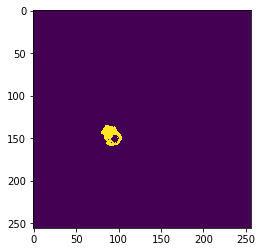

In [25]:
plt.imshow(gt[150].reshape(256,256))

In [26]:
def batch_gen1(imgs, msks, batch_size, infinite=False, re_seed=False):

    assert imgs.dtype == np.float32

    if msks is None:
        msks = np.random.rand(imgs.shape).round().astype(np.uint8)
    else:
        msks = (msks > 0).astype('uint8')
        assert msks.dtype == np.uint8
        assert np.min(msks) == 0 and np.max(msks) == 1, "Masks should be in [0,1]."
        assert len(np.unique(msks)) == 2, "Masks should be binary."

    X_batch = np.empty((batch_size,) + (256, 256, 1))
    Y_batch = np.empty((batch_size,) + (256, 256, 1))


    while True:

        if re_seed:
            np.random.seed(int(time()) + np.random.randint(0, 2**16))

        for batch_idx in range(batch_size):
            
            idx = np.random.randint(imgs.shape[0])
            
            X_batch[batch_idx] = imgs[idx]
            Y_batch[batch_idx] = msks[idx]

        assert np.min(X_batch) == -1
        assert np.max(X_batch) == 1
        assert len(np.unique(Y_batch)) <= 2
        yield (X_batch, Y_batch)

        if not infinite:
            break

In [27]:
from time import time
gen_trn = batch_gen1(imgs=data, msks=gt, infinite=True, re_seed=True,
                            batch_size=1)
gen_val = batch_gen1(imgs=data, msks=gt, infinite=True, re_seed=True,
                            batch_size=1)

In [28]:
img_trn_batch, msk_trn_batch = next(gen_trn)
img_val_batch, msk_val_batch = next(gen_val)

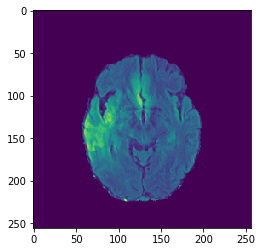

In [28]:
plt.imshow(img_trn_batch.reshape(256,256))

In [30]:
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Flatten, Reshape, Lambda, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
#from skimage.transform import resize

In [31]:
#from time import time
from os import path, mkdir
import argparse
import keras.backend as K
import logging
import numpy as np
import pickle

In [32]:
def jaccard_coef(y_true, y_pred):
    smooth = 1.0
    y_true_flat = K.flatten(y_true)
    y_pred_flat = K.flatten(y_pred)
    intersection = K.sum(y_true_flat * y_pred_flat)
    d = (2.0 * intersection + smooth) / (K.sum(y_true_flat) + K.sum(y_pred_flat) + smooth)
    jac = d/(2-d)
    return jac

In [33]:
def dice_coef(y_true, y_pred):
    smooth = 1.0
    y_true_flat = K.flatten(y_true)
    y_pred_flat = K.flatten(y_pred)
    intersection = K.sum(y_true_flat * y_pred_flat)
    return (2.0 * intersection + smooth) / (K.sum(y_true_flat) + K.sum(y_pred_flat) + smooth)

In [31]:
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [34]:
K.set_image_dim_ordering('tf')

inputs = Input(shape=(256, 256, 1))

conv1 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(inputs)
conv1 = Activation('relu')(conv1)
conv1 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)

conv2 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(pool1)
conv2 = Activation('relu')(conv2)
conv2 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)

conv3 = Convolution2D(128, 3, 3, border_mode='same', init='he_normal')(pool2)
conv3 = Activation('relu')(conv3)
conv3 = Convolution2D(128, 3, 3, border_mode='same', init='he_normal')(conv3)
conv3 = Activation('relu')(conv3)
conv3 = Dropout(0.5)(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)

conv4 = Convolution2D(256, 3, 3, border_mode='same', init='he_normal')(pool3)
conv4 = Activation('relu')(conv4)
conv4 = Convolution2D(256, 3, 3, border_mode='same', init='he_normal')(conv4)
conv4 = Activation('relu')(conv4)
conv4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

conv5 = Convolution2D(512, 3, 3, border_mode='same', init='he_normal')(pool4)
conv5 = Activation('relu')(conv5)
conv5 = Convolution2D(512, 3, 3, border_mode='same', init='he_normal')(conv5)
conv5 = Activation('relu')(conv5)
conv5 = Dropout(0.5)(conv5)

up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4],
            mode='concat', concat_axis=3)
conv6 = Convolution2D(256, 3, 3, border_mode='same', init='he_normal')(up6)
conv6 = Activation('relu')(conv6)
conv6 = Convolution2D(256, 3, 3, border_mode='same', init='he_normal')(conv6)
conv6 = Activation('relu')(conv6)
conv6 = Dropout(0.5)(conv6)

up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3],
            mode='concat', concat_axis=3)
conv7 = Convolution2D(128, 3, 3, border_mode='same', init='he_normal')(up7)
conv7 = Activation('relu')(conv7)
conv7 = Convolution2D(128, 3, 3, border_mode='same', init='he_normal')(conv7)
conv7 = Activation('relu')(conv7)

up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2],
            mode='concat', concat_axis=3)
conv8 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(up8)
conv8 = Activation('relu')(conv8)
conv8 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(conv8)
conv8 = Activation('relu')(conv8)

up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1],
            mode='concat', concat_axis=3)
conv9 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(up9)
conv9 = Activation('relu')(conv9)
conv9 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(conv9)
conv9 = Activation('relu')(conv9)

# Softmax Activation setup begin.
conv10 = Convolution2D(2, 1, 1)(conv9)

output = Flatten()(conv10)
H, W, D = (256, 256, 2)
output = Reshape((H * W, D))(output)
output = Activation('softmax')(output)
output = Reshape((256, 256, 2))(output)  # 128 x 128 x 2

def probability_positive(onehot):
    return onehot[:, :, :, 1]
output = Lambda(probability_positive)(output)
output = Reshape((256, 256, 1))(output)

def weighted_log_loss(yt, yp):
           
    a = yt * K.log(yp + K.epsilon())
    b = (1 - yt) * K.log(1 + K.epsilon() - yp)
    m = 5
            # [0,1] -> [-1,0] -> [1,0] -> [m-1,0] -> [m,1]
    w = ((yt - 1) * -1) * (m - 1) + 1
    return -1 * K.mean(w * (a + b))
            

net = Model(input=inputs, output=output)
net.compile(optimizer=Adam(lr=0.0005),
                loss=weighted_log_loss,
                metrics=[dice_coef, jaccard_coef])


C:\Users\Ratul\Anaconda3\envs\tensrbk\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_initializer="he_normal", padding="same")`
C:\Users\Ratul\Anaconda3\envs\tensrbk\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_initializer="he_normal", padding="same")`
C:\Users\Ratul\Anaconda3\envs\tensrbk\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_initializer="he_normal", padding="same")`
C:\Users\Ratul\Anaconda3\envs\tensrbk\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_initializer="he_normal", padding="same")`
C:\Users\Ratul\Anaconda3\envs\tensrbk\lib\site-packages\ipykernel\__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), 

In [35]:
import sys
def funcname():
    return sys._getframe(1).f_code.co_name

In [36]:
def train():

    logger = logging.getLogger(funcname())

    gen_trn = batch_gen1(imgs=data, msks=gt, infinite=True, re_seed=True,
                                batch_size=1)
    gen_val = batch_gen1(imgs=data, msks=gt, infinite=True, re_seed=True,
                                batch_size=1)

    cb = []
    cb.append(ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                patience=5, cooldown=3, min_lr=1e-6, verbose=1))
    cb.append(EarlyStopping(monitor='val_loss', min_delta=1e-3,
                            patience=15, verbose=1, mode='min'))
    cb.append(ModelCheckpoint('checkpoints_dice_loss/' + 'val_loss_new.net',
                                monitor='val_loss', save_best_only=True, verbose=1))
    cb.append(ModelCheckpoint('checkpoints_dice_loss/' + 'trn_loss_new.net',
                                monitor='loss', save_best_only=True, verbose=1))


    logger.info('Training for %d epochs.' % 25)

    result = net.fit_generator(
        nb_epoch=10,
        samples_per_epoch=max(1 * 50, 2048),
        generator=gen_trn,
        nb_val_samples=max(1 * 25, 1024),
        validation_data=gen_val,
        initial_epoch=0,
        callbacks=cb,
        class_weight='auto',
        verbose=1
    )

In [37]:
train()

C:\Users\Ratul\Anaconda3\envs\tensrbk\lib\site-packages\ipykernel\__main__.py:32: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\Ratul\Anaconda3\envs\tensrbk\lib\site-packages\ipykernel\__main__.py:32: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(epochs=10, initial_epoch=0, generator=<generator..., class_weight="auto", steps_per_epoch=2048, callbacks=[<keras.ca..., validation_data=<generator..., verbose=1, validation_steps=1024)`


Epoch 1/10
2048/2048 [==============================] - 481s 235ms/step - loss: 0.2572 - dice_coef: 0.0042 - jaccard_coef: 0.0024 - val_loss: 0.2656 - val_dice_coef: 0.0037 - val_jaccard_coef: 0.0018

Epoch 00001: val_loss improved from inf to 0.26563, saving model to checkpoints_dice_loss/val_loss_new.net

Epoch 00001: loss improved from inf to 0.25719, saving model to checkpoints_dice_loss/trn_loss_new.net
Epoch 2/10
2048/2048 [==============================] - 441s 215ms/step - loss: 0.2548 - dice_coef: 0.0043 - jaccard_coef: 0.0024 - val_loss: 0.2416 - val_dice_coef: 0.0064 - val_jaccard_coef: 0.0042

Epoch 00002: val_loss improved from 0.26563 to 0.24159, saving model to checkpoints_dice_loss/val_loss_new.net

Epoch 00002: loss improved from 0.25719 to 0.25476, saving model to checkpoints_dice_loss/trn_loss_new.net
Epoch 3/10
2048/2048 [==============================] - 440s 215ms/step - loss: 0.2559 - dice_coef: 0.0038 - jaccard_coef: 0.0019 - val_loss: 0.2750 - val_dice_coef: 0.

In [38]:
net.load_weights('./checkpoints_dice_loss/trn_loss_new.net')

In [39]:
from math import sqrt
from keras.metrics import binary_crossentropy

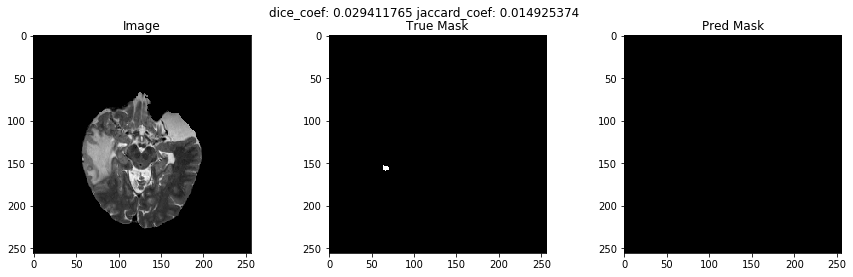

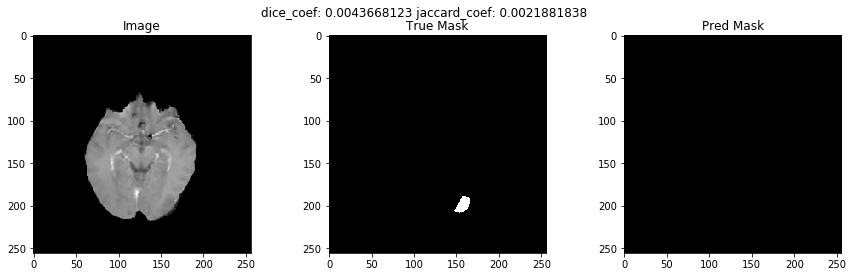

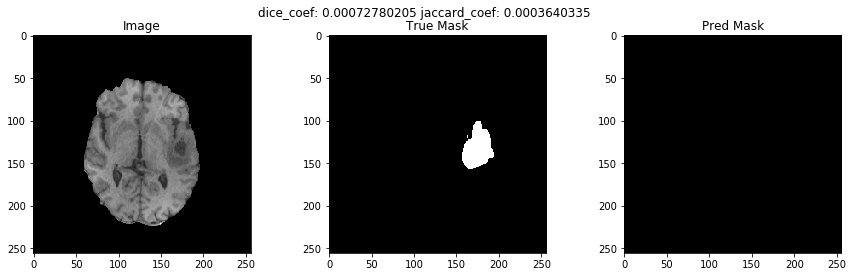

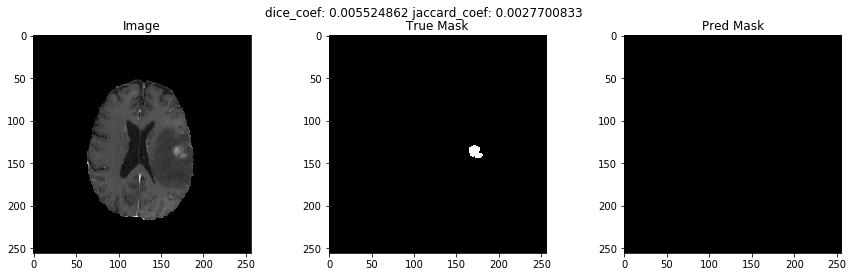

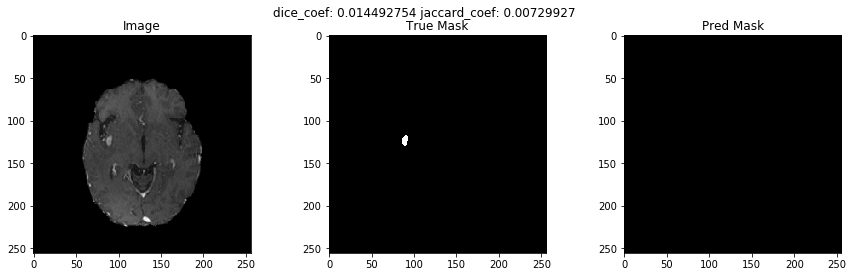

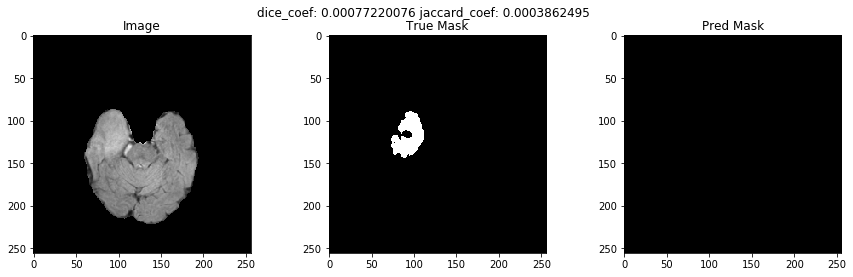

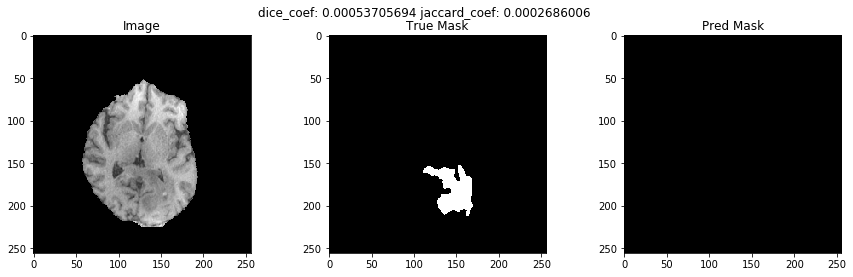

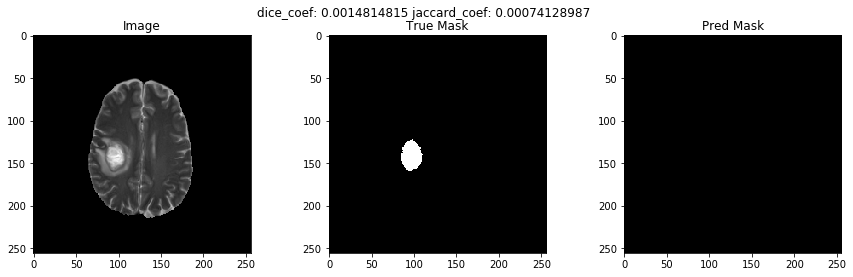

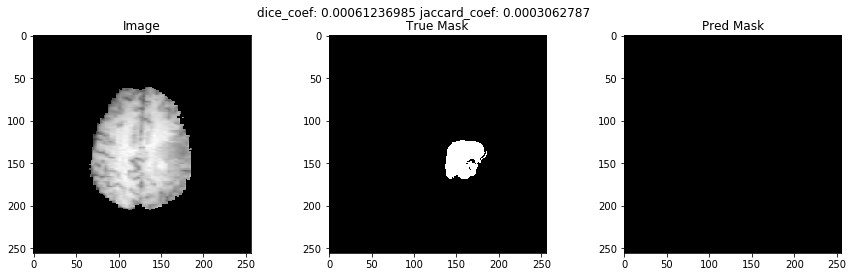

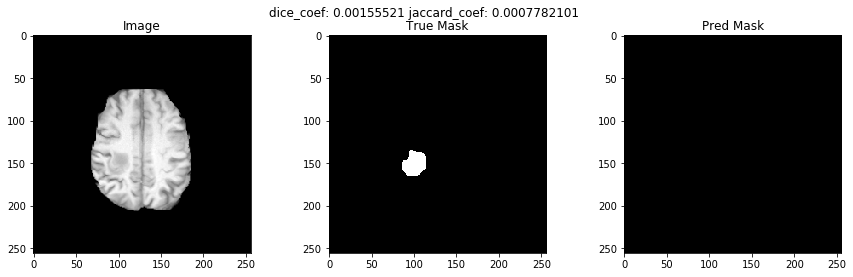

In [40]:
# Plot predictions.
def metric_wrapper(yt, yp, metric):
    return K.get_value(metric(K.variable(yt), K.variable(yp)))

data_gen = batch_gen1(imgs=data, msks=gt, batch_size=10)
img_batch, msk_batch = next(data_gen)
prd_batch = net.predict(img_batch)
prd_batch = prd_batch

for img, msk, prd in zip(img_batch, msk_batch, prd_batch):
    r = c = int(sqrt(img.size))
    b = metric_wrapper(msk, prd, binary_crossentropy)
    d = metric_wrapper(msk, prd, dice_coef)
    j = metric_wrapper(msk, prd, jaccard_coef)
    fig,_ = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    fig.axes[0].set_title('Image')
    fig.axes[0].imshow(img.reshape(r,c), cmap='gray')
    fig.axes[1].set_title('True Mask')
    fig.axes[1].imshow(msk.reshape(r,c), cmap='gray')
    fig.axes[2].set_title('Pred Mask')
    fig.axes[2].imshow(prd.reshape(r,c), cmap='gray')
    fig.suptitle('dice_coef: '+str(d)+' jaccard_coef: '+str(j))   
    plt.show()